In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
diabetes = pd.read_csv(r'original.csv')
print(diabetes)



     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.describe() #gives statistical info

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


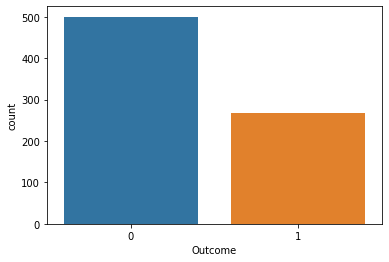

In [12]:
sns.countplot(x= 'Outcome', data=diabetes) #Outcomes are in the form of 0s and 1s

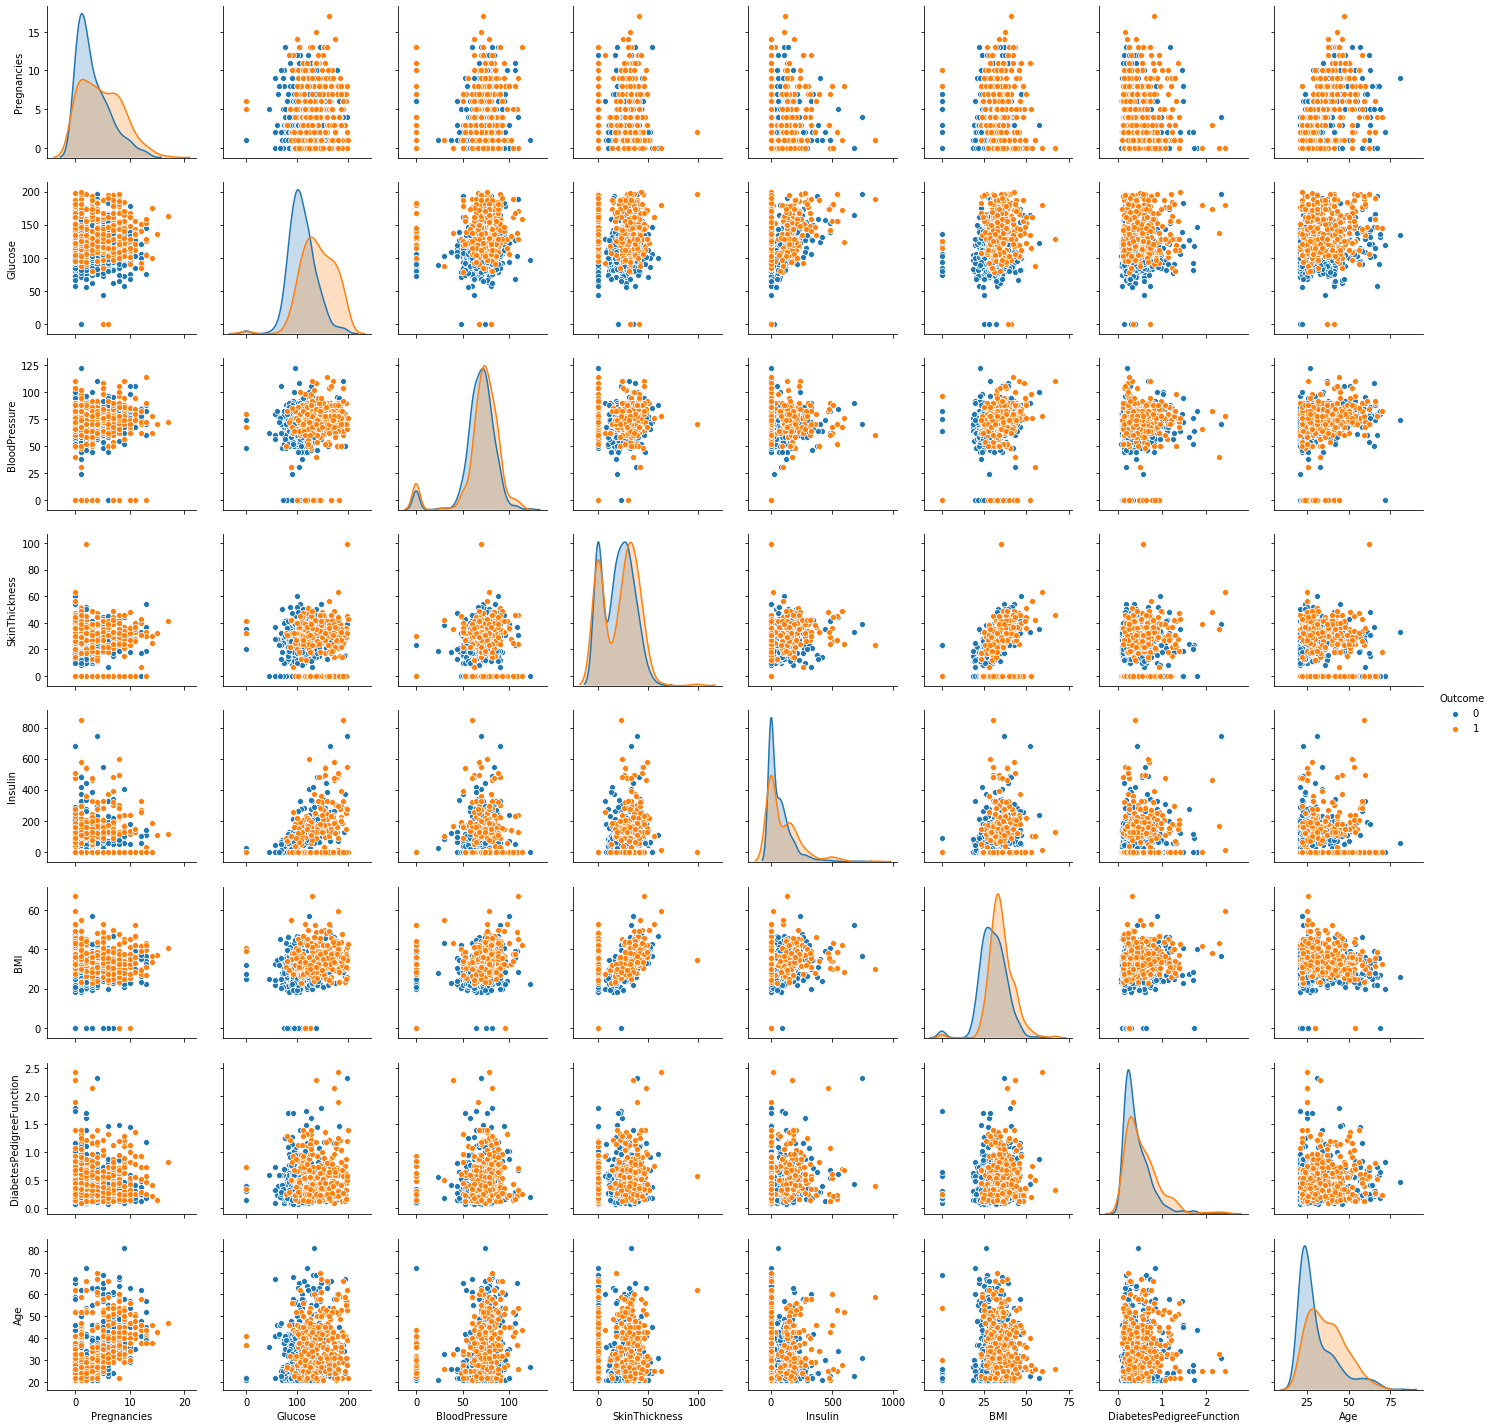

In [13]:
sns.pairplot(diabetes, hue = 'Outcome', vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

#pairplot helps us compare the classes so that we can see if two classes are separable or maybe they have some correlation and stuff like that


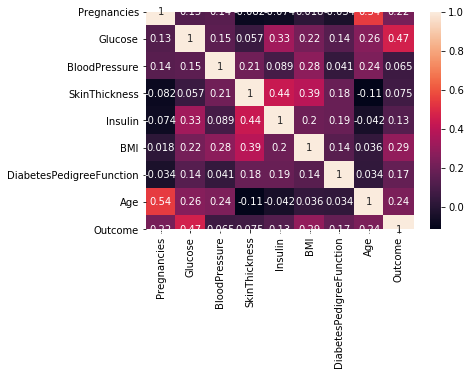

In [14]:
sns.heatmap(diabetes.corr(), annot = True)
#plotting the correlation between classes

In [15]:
X = diabetes.iloc[:, 0:8].values #all rows and all the 8 columns we have
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [16]:
Y= diabetes.iloc[:,8].values #the last column or the output
Y


array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [17]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [18]:
#Splitting the dataset into Training set and Test test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
#exports the test inputs and outputs
data_test = pd.DataFrame(X_test,y_test)
datatoexcel = pd.ExcelWriter("INPUT/TEST/test.xlsx")
data_test.to_excel(datatoexcel)
datatoexcel.save()
#exports the train inputs and outputs
data_train = pd.DataFrame(X_train,y_train)
datatoexcel = pd.ExcelWriter("INPUT/TRAIN/train.xlsx")
data_train.to_excel(datatoexcel)
datatoexcel.save()



In [19]:
#add layers in neural network
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=400,activation='relu',input_shape=(8, )))
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Dense(units=400,activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
classifier.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               3600      
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 164,401
Trainable params: 164,401
Non-trainable params: 0
_________________________________________________________________


In [20]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:

epochs_hist = classifier.fit(X_train, y_train, validation_split = 0.25, epochs=200)

Train on 460 samples, validate on 154 samples
Epoch 1/200
460/460 [==============================] - 1s 2ms/sample - loss: 0.5656 - accuracy: 0.7239 - val_loss: 0.4908 - val_accuracy: 0.7273
Epoch 2/200
460/460 [==============================] - 0s 282us/sample - loss: 0.4733 - accuracy: 0.7739 - val_loss: 0.4971 - val_accuracy: 0.7273
Epoch 3/200
460/460 [==============================] - 0s 186us/sample - loss: 0.4476 - accuracy: 0.7826 - val_loss: 0.5098 - val_accuracy: 0.7403
Epoch 4/200
460/460 [==============================] - 0s 208us/sample - loss: 0.4358 - accuracy: 0.7935 - val_loss: 0.5110 - val_accuracy: 0.7208
Epoch 5/200
460/460 [==============================] - 0s 137us/sample - loss: 0.4315 - accuracy: 0.7957 - val_loss: 0.5149 - val_accuracy: 0.7338
Epoch 6/200
460/460 [==============================] - 0s 189us/sample - loss: 0.4313 - accuracy: 0.8000 - val_loss: 0.5101 - val_accuracy: 0.7273
Epoch 7/200
460/460 [==============================] - 0s 143us/sample - l

460/460 [==============================] - 0s 126us/sample - loss: 0.0506 - accuracy: 0.9913 - val_loss: 1.5042 - val_accuracy: 0.6623
Epoch 112/200
460/460 [==============================] - 0s 130us/sample - loss: 0.0496 - accuracy: 0.9935 - val_loss: 1.4714 - val_accuracy: 0.6623
Epoch 113/200
460/460 [==============================] - 0s 124us/sample - loss: 0.0516 - accuracy: 0.9891 - val_loss: 1.5689 - val_accuracy: 0.6753
Epoch 114/200
460/460 [==============================] - 0s 134us/sample - loss: 0.0671 - accuracy: 0.9783 - val_loss: 1.4807 - val_accuracy: 0.6818
Epoch 115/200
460/460 [==============================] - 0s 130us/sample - loss: 0.0561 - accuracy: 0.9891 - val_loss: 1.4425 - val_accuracy: 0.6818
Epoch 116/200
460/460 [==============================] - 0s 126us/sample - loss: 0.0504 - accuracy: 0.9913 - val_loss: 1.5302 - val_accuracy: 0.6753
Epoch 117/200
460/460 [==============================] - 0s 132us/sample - loss: 0.0505 - accuracy: 0.9870 - val_loss: 1

460/460 [==============================] - 0s 126us/sample - loss: 0.0226 - accuracy: 0.9978 - val_loss: 2.0389 - val_accuracy: 0.6558
Epoch 167/200
460/460 [==============================] - 0s 102us/sample - loss: 0.0334 - accuracy: 0.9870 - val_loss: 1.9886 - val_accuracy: 0.6753
Epoch 168/200
460/460 [==============================] - 0s 100us/sample - loss: 0.0367 - accuracy: 0.9870 - val_loss: 2.1326 - val_accuracy: 0.6753
Epoch 169/200
460/460 [==============================] - 0s 104us/sample - loss: 0.0383 - accuracy: 0.9826 - val_loss: 2.0060 - val_accuracy: 0.6753
Epoch 170/200
460/460 [==============================] - 0s 113us/sample - loss: 0.0288 - accuracy: 0.9913 - val_loss: 2.0857 - val_accuracy: 0.6494
Epoch 171/200
460/460 [==============================] - 0s 100us/sample - loss: 0.0257 - accuracy: 0.9935 - val_loss: 2.0985 - val_accuracy: 0.6753
Epoch 172/200
460/460 [==============================] - 0s 100us/sample - loss: 0.0265 - accuracy: 0.9935 - val_loss: 2

In [22]:
#saving model with its parameters in the disk
from numpy import loadtxt

scores = classifier.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))
# save model and architecture to single file
classifier.save("models/model.h5")
print("Saved model to disk")

accuracy: 88.80%
Saved model to disk


In [23]:
# load model
model = tf.keras.models.load_model("models/model.h5")
# summarize model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               3600      
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 164,401
Trainable params: 164,401
Non-trainable params: 0
_________________________________________________________________


In [25]:
#Evaluating the model
epochs_hist.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

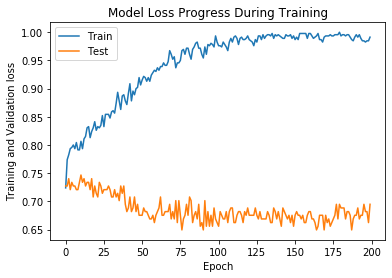

In [26]:
plt.plot(epochs_hist.history['accuracy'])
plt.plot(epochs_hist.history['val_accuracy'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation loss')
plt.legend(['Train', 'Test'])




(2.0, 0.0)

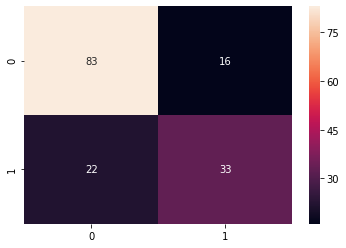

In [27]:
#test set Performance
from sklearn.metrics import confusion_matrix
y_test_pred = classifier.predict(X_test)
y_test_pred = (y_test_pred>0.5)
cm=confusion_matrix(y_test, y_test_pred)
ax=sns.heatmap(cm,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [28]:
data_test = pd.DataFrame(y_test_pred)
datatoexcel = pd.ExcelWriter("OUTPUT/output.xlsx")
data_test.to_excel(datatoexcel)
datatoexcel.save()

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        99
           1       0.67      0.60      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [30]:
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity

0.6

In [32]:
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
accuracy

0.7532467532467533

In [33]:
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

Sensitivity :  0.8383838383838383


In [34]:
from sklearn.metrics import roc_curve,roc_auc_score
 
fpr , tpr , thresholds = roc_curve ( y_test , y_test_pred)

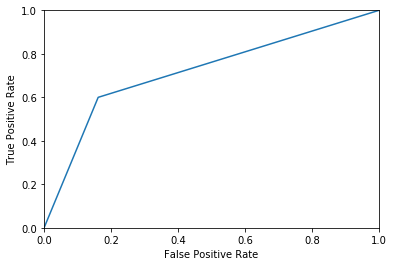

In [35]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr) 

In [36]:
auc_score=roc_auc_score(y_test,y_test_pred) 
auc_score

0.7191919191919192